# Bộ phân loại Mèo và Chó

## Mục lục

1. Tiền xử lý dữ liệu
2. Xây dựng mô hình
3. Huấn luyện mô hình
4. Đánh giá mô hình


In [34]:
import os
import pickle
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

## Một số hàm cần thiết:


1. Hàm tối ưu bộ nhớ: hàm này sẽ thiết lập kiểu dữ liệu cho các cột sao cho tối thiểu bộ nhớ được cấp phát giúp tối ưu cho dung lượng cho file


In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if (
                c_min > np.finfo(np.float32).min
                and c_max < np.finfo(np.float32).max
            ):
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print(
            "Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

2. Hàm chuyển 2 ma trận X và ma trận Y thành 1 DataFrame


In [5]:
def to_dataframe(X,y):
    df =  pd.DataFrame(np.concatenate((X,y[:, np.newaxis]),axis=1))

    print(f"data frame size: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print("optimizing dataframe")
    print(df.dtypes)
    df = reduce_mem_usage(df)
    print("done optimizing")
    return df

3. Hàm lưu DataFrame


In [6]:
def save(df,datapath):
    # Save the dataframe to a csv file
    df.to_pickle(datapath)


4. Hàm load DataFrame


In [7]:
def load(datapath):
    df = pd.read_pickle(datapath)
    return df

### 1. Tiền sử lý dữ liệu


Hàm preprocess sẽ thực hiện các bước sau:

1. Load ảnh từ đường dẫn
2. Resize ảnh về kích thước 150,150,3
3. Trải ảnh thành mảng 1 chiều
4. Chuyển thành dataframe


-   Xử lý 1 ảnh


In [8]:
def preprocessImg(img):
    img_resized = resize(img,(150,150,3))
    img_flat = img_resized.flatten()
    img_flat = np.array(img_flat)
    return img_resized, img_flat

In [ ]:
img_test = r"../data/raw/training_set/cats/cat.1.jpg"
assert os.path.exists(img_test), "Image not found"

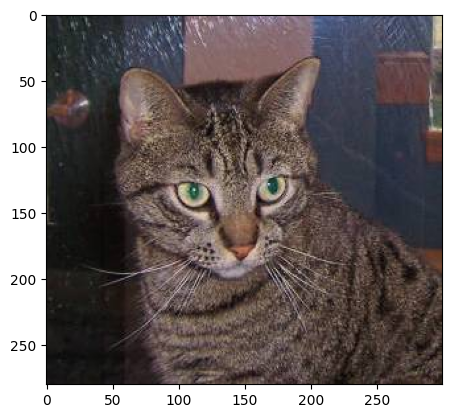

In [11]:
plt.imshow(imread(img_test))
plt.show()

Original image shape: (280, 300, 3)
Resized image shape: (150, 150, 3)
Flattened image shape: (67500,)


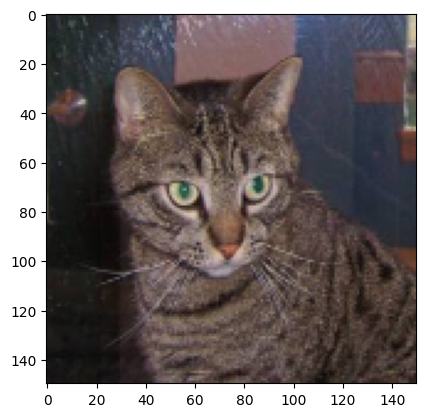

In [12]:
img = imread(img_test)
img_resized, img_flat = preprocessImg(img)
print(f"Original image shape: {img.shape}")
print(f"Resized image shape: {img_resized.shape}")
print(f"Flattened image shape: {img_flat.shape}")
plt.imshow(img_resized)
plt.show()

-   Xử lý nhiều ảnh


In [9]:
def preprocess(rawpath):
    print("Preprocessing data..")

    DataDirectory = rawpath

    target = []
    flat_data = []
    # images = []

    Categories = ["cats","dogs"]

    for i in Categories:
        print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
        # Encode categories cute puppy as 0, icecream cone as 1 and red rose as 2
        target_class = Categories.index(i)
        # Create data path for all folders under MinorProject
        path = os.path.join(DataDirectory,i)
        # Image resizing, to ensure all images are of same dimensions
        for img in os.listdir(path):
            img_array = imread(os.path.join(path,img))
            # Skimage normalizes the value of image
            img_resized, img_flat = preprocessImg(img_array)
            flat_data.append(img_flat)
            # images.append(img_resized)
            target.append(target_class)
        # Convert list to numpy array format
    flat_data = np.array(flat_data)
    # images = np.array(images)
    target = np.array(target)

    df = to_dataframe(flat_data,target)
    return df

In [39]:
TrainPath = r"../data/raw/training_set"
df = preprocess(TrainPath)
df.head()
df.info()

Preprocessing data..
Category is: cats 	Label encoded as: 0
Category is: dogs 	Label encoded as: 1
data frame size: 4122.51 MB
optimizing dataframe
Mem. usage decreased to 2061.25 Mb (50.0% reduction)
done optimizing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Columns: 67501 entries, 0 to 67500
dtypes: float32(67501)
memory usage: 2.0 GB


Load data đã được process


In [46]:
DataProcesed = r"../data/processed/trainingdata.p"
df = load(DataProcesed)

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,67500
0,0.154919,0.174317,0.159261,0.158661,0.174558,0.170846,0.160470,0.175946,0.187711,0.162110,...,0.197737,0.138908,0.111461,0.189636,0.138860,0.107701,0.176476,0.136531,0.101754,0.0
1,0.112228,0.128223,0.163371,0.068746,0.084741,0.126227,0.088115,0.103878,0.150676,0.149697,...,0.756716,0.752599,0.015991,0.728919,0.718806,0.022200,0.675097,0.655304,0.015257,0.0
2,0.869272,0.873193,0.853585,0.873435,0.877356,0.857749,0.875278,0.879199,0.859591,0.869855,...,0.838799,0.828248,0.816542,0.845064,0.832109,0.811390,0.850880,0.828851,0.824736,0.0
3,0.548967,0.439163,0.294065,0.548980,0.439176,0.294078,0.564693,0.454889,0.309791,0.572549,...,0.427451,0.384314,0.274510,0.372641,0.325582,0.231464,0.353033,0.305974,0.211856,0.0
4,0.217073,0.203064,0.034769,0.229297,0.194294,0.065444,0.234197,0.186017,0.078425,0.241608,...,0.090419,0.594939,0.378781,0.116092,0.620151,0.400710,0.106884,0.611021,0.392386,0.0


In [29]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,67500
count,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,...,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000,8005.000000
mean,0.456829,0.439965,0.408078,0.457825,0.441049,0.409004,0.458403,0.441720,0.409514,0.459013,...,0.493823,0.470378,0.437818,0.492923,0.469452,0.437126,0.491928,0.468366,0.436388,0.500312
std,0.279196,0.276715,0.281783,0.278624,0.276287,0.281383,0.278238,0.275985,0.281012,0.277825,...,0.267667,0.261850,0.269824,0.268093,0.262394,0.270207,0.269752,0.263908,0.271575,0.500031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222055,0.206169,0.168258,0.224330,0.207955,0.170483,0.227005,0.208516,0.170082,0.227327,...,0.282715,0.262271,0.214275,0.282543,0.261766,0.213212,0.278442,0.258078,0.212315,0.000000
50%,0.436742,0.415686,0.365312,0.438343,0.418755,0.369165,0.439773,0.420589,0.368382,0.439055,...,0.489814,0.460721,0.411534,0.487758,0.458671,0.409451,0.486875,0.456882,0.409457,1.000000
75%,0.664817,0.640590,0.611806,0.665776,0.640363,0.610122,0.666555,0.641902,0.611062,0.668430,...,0.693066,0.661424,0.635434,0.694793,0.662567,0.632713,0.694255,0.662015,0.633783,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df.dtypes

0        float32
1        float32
2        float32
3        float32
4        float32
          ...   
67496    float32
67497    float32
67498    float32
67499    float32
67500    float32
Length: 67501, dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Columns: 67501 entries, 0 to 67500
dtypes: float32(67501)
memory usage: 2.0 GB


### 2. Xây dựng mô hình


import các mô hình học máy


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

1. Voting


In [11]:
class VotingModel:
    def __init__(self):
        self.model = None
        self.initialize()
    def initialize(self):
        #create a list of base models with the best hyperparameters
        self.estimators = [('rf', RandomForestClassifier(n_estimators=1000,verbose=3,random_state=42)),
                            ('knn', KNeighborsClassifier(n_neighbors=10000,weights='distance',metric='manhattan')),
                            ('lr', LogisticRegression(max_iter=1000,random_state=42,verbose=3)),
                            ('dt', DecisionTreeClassifier(max_features='sqrt')),
                            # ('mlp', MLPClassifier(hidden_layer_sizes=(512,256,128,), max_iter=1000,activation='tanh',solver='sgd',random_state=42,early_stopping=True,learning_rate='adaptive',alpha=0.0001,verbose=True))
                            ]
        self.model = VotingClassifier(estimators=self.estimators, voting='soft',verbose=10)
    
    def fit(self,x_train,y_train):
        self.model.fit(x_train,y_train)

    def predict_proba(self,X):
        return self.model.predict_proba(X), self.model.classes_
    def predict(self,X):
        return self.model.predict(X), self.model.classes_


2. StackedModel:


In [12]:
class StackedModel:
    def __init__(self):
        self.model = None
        self.initialize()
    
    def initialize(self):
        #create a list of base models with the best hyperparameters
        self.estimators = [('rf', RandomForestClassifier(n_estimators=1000,verbose=3,random_state=42)),
                           ('knn', KNeighborsClassifier(n_neighbors=5,weights='distance',metric='manhattan')),
                           ('dt', DecisionTreeClassifier(max_features='sqrt')),
                           ('lr', LogisticRegression(max_iter=1000,random_state=42,verbose=3)),
                           ]
        self.model = StackingClassifier(estimators=self.estimators, final_estimator=DecisionTreeClassifier(max_features='sqrt'),verbose=10)
    
    def fit(self,x_train,y_train):
        self.model.fit(x_train,y_train)

    def predict_proba(self,X):
        return self.model.predict_proba(X), self.model.classes_
    
    def predict(self,X):
        return self.model.predict(X), self.model.classes_

3. LogisticRegression


In [13]:
class LogisticRegressionModel:
    def __init__(self):
        self.model = None
        self.initialize()
    
    def initialize(self):
        self.model = LogisticRegression(max_iter=1000,random_state=42,verbose=3)
    
    def fit(self,X,y):
        self.model.fit(X,y)
    
    def predict_proba(self,X):
        return self.model.predict_proba(X), self.model.classes_

    def predict(self,X):
        return self.model.predict(X), self.model.classes_

4. DecisionTree


In [86]:
class DecisionTreeModel:
    def __init__(self):
        self.model = []
        self.initialize()
    
    def initialize(self):
        self.model = DecisionTreeClassifier(max_features='sqrt')
    
    def fit(self,X,y):
        self.model.fit(X,y)
    
    def predict_proba(self,X):
        return self.model.predict_proba(X), self.model.classes_

    def predict(self,X):
        return self.model.predict(X), self.model.classes_

5. KNN


In [75]:
class KNNModel:
    def __init__(self):
        self.tuned_parameters = [{'n_neighbors': [2, 3, 5, 7, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}]
        self.cv = None
        self.model = None
        self.initialize()
    
    def initialize(self):
        self.cv = GridSearchCV(KNeighborsClassifier(), self.tuned_parameters, cv=5, verbose=3)

    def fit(self,x_train,y_train):
        self.cv.fit(x_train,y_train)
        self.model = self.cv.best_estimator_

    def predict_proba(self,X):
        return self.model.predict_proba(X), self.model.classes_
    
    def predict(self,X):
        return self.model.predict(X), self.model.classes_
    

6. MLP


In [16]:
class MLPModel:
    def __init__(self):
        # self.tuned_parameters = [{'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive']}]
        self.cv = None
        self.model = None
        self.initialize()
    
    def initialize(self):
        self.model = MLPClassifier(hidden_layer_sizes=(512,256,128,), max_iter=1000,activation='tanh',solver='sgd',random_state=42,early_stopping=True,learning_rate='adaptive',alpha=0.0001,verbose=True)

    def fit(self,x_train,y_train):
        self.model.fit(x_train,y_train)

    def predict_proba(self,X):
        return self.model.predict_proba(X), self.model.classes_
    
    def predict(self,X):
        return self.model.predict(X), self.model.classes

7. RandomForerst


In [17]:
class RandomForestModel:
    def __init__(self):
        self.model = None
        self.initialize()
    
    def initialize(self):
        self.model = RandomForestClassifier(n_estimators=1000,verbose=10,random_state=42)
    
    def fit(self,X,y):
        self.model.fit(X,y)
    
    def predict_proba(self,X):
        return self.model.predict_proba(X), self.model.classes_

    def predict(self,X):
        return self.model.predict(X), self.model.classes_


8. Model chính


In [114]:
class Model:
    # This class provides an interface for the model (while this is not
    # strictly needed for a Random Forest classifier, it shows an example
    # of how the class could be constructed if the model is bespoke)
    def __init__(self,type) -> None:
        self.model = None
        self.type = type
        self.initialize()
    
    def initialize(self):
        match self.type:
            case "RandomForest":
                self.model = RandomForestModel()
            case "LogisticRegression":
                self.model = LogisticRegressionModel()
            case "DecisionTree":
                self.model = DecisionTreeModel()
            case "KNN":
                self.model = KNNModel()
            case "MLP":
                self.model = MLPModel()
            case "StackedEnsemble":
                self.model = StackedModel()
            case "Vote":
                self.model = VotingModel()

    def train(self,X,y):
        assert(self.model is not None)
        self.model.fit(X,y)
        
    def predict_proba(self,X):
        prediction,classes = self.model.predict_proba(X)
        return [prediction, classes]

    def predict(self,X):
        prediction,classes = self.model.predict(X) 
        return [prediction, classes]

### 3. Huấn luyện mô hình


In [115]:
modelType = "DecisionTree"

In [137]:
def train(modelType):
    # Load the data
    filepath = DataProcesed

    print("loading data....")
    if(not os.path.exists(filepath)):
        df = preprocess("trainingdata")
    else:
        df = load(filepath)

    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    # Train the model
    print("trainnning....")
    model = Model(modelType)
    model.train(X,y)

    return model


Train mô hình


In [138]:
model = train(modelType)

loading data....
trainnning....


In [139]:
print(model)

Dự đoán bằng mô hình đã train


Chúng ta sẽ xây dựng một class Results để chứa kết quả đánh giá của mô hình


In [169]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

class Results:
    # A results class which calculates the predictions and metrics from a model
    # evaluation process
    def __init__(self,y_true,y_pred,classes) -> None:
        self.y_true = y_true
        self.y_pred = y_pred
        self.classes = classes
        self.metrics = {}
    
    def get_metrics(self):
        self.metrics['confusion_matrix'] = confusion_matrix(self.y_true,self.y_pred)
        self.metrics["accuracy"] = accuracy_score(self.y_true,self.y_pred)
        self.metrics["classification_report"] = classification_report(self.y_true,self.y_pred)

    def print_metrics(self):
        for key in self.metrics:
            print(f"{key} =\n {self.metrics[key]}")
    

Hàm predict sẽ load mô hình, thực hiện dự đoán và trả về kết quả


In [170]:
def predict(model):
    # Load the data to make predictions on
    print("Loading testing data")
    filepath = r"../data/processed/testingdata.p"
    if(not os.path.exists(filepath)):
        df = preprocess("testingdata")
    else:
        df = load(filepath)

    x = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    # Load the model
    # Make predictions from the trained model
    [y_hat, classes] = model.predict(x)
    
    Result = Results(y,y_hat,classes)
    return Result

In [171]:
res = predict(model)

Loading testing data


### 3. Đánh giá dữ liệu


Tính toán các thông số như confusion_matrix,accuracy,reports


In [172]:

res.get_metrics()
res.print_metrics()
# Save metrics

confusion_matrix =
 [[583 428]
 [461 551]]
accuracy =
 0.5605536332179931
classification_report =
               precision    recall  f1-score   support

         0.0       0.56      0.58      0.57      1011
         1.0       0.56      0.54      0.55      1012

    accuracy                           0.56      2023
   macro avg       0.56      0.56      0.56      2023
weighted avg       0.56      0.56      0.56      2023



4. Trực quan hóa kết quả


In [175]:
from sklearn.metrics import ConfusionMatrixDisplay

def confusion(y_true,y_pred,labels):
    # Create a confustion matrix from the results
    fig, ax = plt.subplots()
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,
                                            labels=labels,
                                            ax=ax,
                                            normalize='true',
                                            cmap='gray')


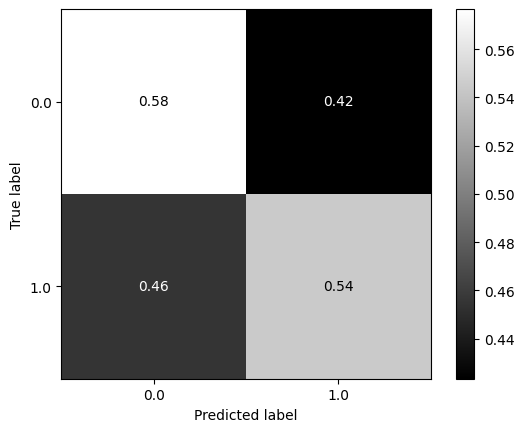

In [176]:
confusion(res.y_true,res.y_pred,res.classes)